In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import io
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.3.1


In [3]:
from tensorflow import keras
print(keras.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer

2.4.0


In [4]:
# NN layer params
VOCAB_SIZE = 10000
EMBEDDING_DIMS = 300

In [5]:
data_path = "../../../DataSets/IMDB_Cleaned/clean_data.csv"
df = pd.read_csv(data_path, index_col=[0])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentimentText  25000 non-null  object
 1   Sentiment      25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


,SentimentText,Sentiment
0,first think another disney movie might good it...,1
1,put aside dr house repeat missed desperate hou...,0
2,big fan stephen king s work film made even gre...,1
3,watched horrid thing tv needless say one movie...,0
4,truly enjoyed film acting terrific plot jeff c...,1


In [6]:
df['Sentiment'].value_counts()

1    12500
0    12500
Name: Sentiment, dtype: int64

In [7]:
text_len = df['SentimentText'].apply(len)
min(text_len), np.median(text_len), np.mean(text_len), max(text_len)

(3, 641.0, 873.35696, 9449)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2378f710>]],
      dtype=object)

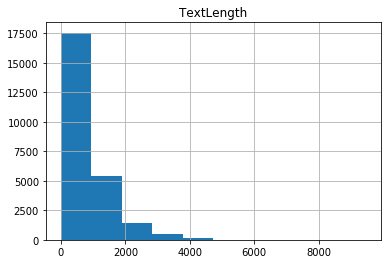

In [8]:
df['TextLength'] = text_len
df.hist('TextLength')

In [9]:
# create the input and output variable 
X=df.SentimentText
y=df.Sentiment
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
type(X), X.shape, X[:3]

(pandas.core.series.Series,
 (25000,),
 0    first think another disney movie might good it...
 1    put aside dr house repeat missed desperate hou...
 2    big fan stephen king s work film made even gre...
 Name: SentimentText, dtype: object)

In [11]:
#?Tokenizer

In [12]:
# tokenize the reviews 
tokenizer=Tokenizer(num_words=10000,oov_token='xxxxxxx')
#tokenizer=Tokenizer(oov_token='xxxxxxx')
# fit on the input data 
tokenizer.fit_on_texts(X)
X_dict=tokenizer.word_index

In [13]:
#?tokenizer

In [14]:
len(X_dict), len(list(enumerate(X_dict.items())))

(74120, 74120)

In [15]:
list(enumerate(X_dict.items()))[:10]

[(0, ('xxxxxxx', 1)),
 (1, ('s', 2)),
 (2, ('movie', 3)),
 (3, ('film', 4)),
 (4, ('not', 5)),
 (5, ('it', 6)),
 (6, ('one', 7)),
 (7, ('like', 8)),
 (8, ('i', 9)),
 (9, ('good', 10))]

In [16]:
# convert the reviews into sequences of word indexes 
X_seq=tokenizer.texts_to_sequences(X)
for x in X_seq[:3]:
    print(len(x),'\n***', x, "\n---")


52 
*** [26, 32, 80, 746, 3, 151, 10, 6, 2, 270, 3, 36, 6, 94, 5, 259, 278, 6, 2020, 46, 3, 26, 134, 3, 76, 221, 58, 46, 6, 1571, 3183, 818, 21, 213, 90, 56, 1283, 3234, 559, 323, 90, 1035, 1, 784, 3657, 2378, 94, 5, 259, 278, 3, 119] 
---
83 
*** [194, 1137, 794, 226, 3159, 965, 1606, 9907, 81, 36, 7, 20, 5, 52, 541, 8290, 3, 45, 114, 9, 122, 60, 51, 99, 147, 2165, 69, 144, 387, 94, 5, 60, 3818, 9484, 77, 11, 564, 2967, 114, 6579, 5028, 627, 1507, 1746, 10, 869, 427, 331, 276, 1, 769, 436, 454, 962, 155, 86, 1, 1388, 4251, 1, 4018, 11, 1146, 9, 122, 8, 200, 3396, 295, 2631, 6, 2, 14, 4252, 2, 13, 59, 3879, 20, 5, 19, 13, 360] 
---
200 
*** [111, 254, 1584, 538, 2, 79, 4, 28, 14, 2729, 254, 538, 2824, 8796, 1, 130, 1609, 81, 226, 228, 565, 2824, 5949, 417, 226, 1, 2, 81, 3235, 1, 172, 1696, 1, 2476, 7553, 1483, 417, 2824, 5949, 7553, 1483, 972, 366, 1, 636, 2211, 1, 9103, 324, 434, 159, 2824, 7553, 1483, 12, 132, 69, 42, 362, 132, 69, 326, 208, 73, 366, 438, 1, 2476, 205, 2824, 8796, 2

In [17]:
# Max length of SentimentText
MAX_LEN = 100
# Pad sequences to max SentimentText length
X_padded_seq=pad_sequences(X_seq,padding='post',maxlen=MAX_LEN)
print("X_padded_seq: ", type(X_padded_seq))
X_padded_seq[:3]


X_padded_seq:  <class 'numpy.ndarray'>


array([[  26,   32,   80,  746,    3,  151,   10,    6,    2,  270,    3,
          36,    6,   94,    5,  259,  278,    6, 2020,   46,    3,   26,
         134,    3,   76,  221,   58,   46,    6, 1571, 3183,  818,   21,
         213,   90,   56, 1283, 3234,  559,  323,   90, 1035,    1,  784,
        3657, 2378,   94,    5,  259,  278,    3,  119,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 194, 1137,  794,  226, 3159,  965, 1606, 9907,   81,   36,    7,
          20,    5,   52,  541, 8290,    3,   45,  114,    9,  122,   60,
          51,   99,  147, 2165,   69,  144,  387,   94,    5,   60, 3818,
        9484,   77,   11,  564, 2967,  114, 6579, 5028,  627, 1507, 1746,
          10,  869,  42

In [18]:
X_padded_seq.shape

(25000, 100)

In [19]:
# Convert y to NumPy array for TF to train
y = np.array(y)
y.shape

(25000,)

In [20]:
X_train, X_test_validation, y_train, y_test_validation = \
train_test_split(X_padded_seq, y, test_size=0.3, random_state=78)

In [21]:
X_test, X_validation, y_test, y_validation = \
train_test_split(X_test_validation, y_test_validation, random_state=78)

In [22]:
print("X_train, y_train:", len(X_train), len(y_train))
print("X_test, y_test  :", len(X_test), len(y_test))
print("X_validation, y_validation:", len(X_validation), len(y_validation))
len(X_train)+len(X_test)+len(X_validation), len(y_train)+len(y_test)+len(y_validation)

X_train, y_train: 17500 17500
X_test, y_test  : 5625 5625
X_validation, y_validation: 1875 1875


(25000, 25000)

In [23]:
tf.keras.layers.Embedding

tensorflow.python.keras.layers.embeddings.Embedding

In [24]:
text_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_length=MAX_LEN,input_dim=VOCAB_SIZE,
                              output_dim=EMBEDDING_DIMS),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
text_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
text_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          3000000   
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 180006    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 3,180,013
Trainable params: 3,180,013
Non-trainable params: 0
_________________________________________________________________


In [25]:
#?text_model.fit

In [26]:
# Train
num_epochs = 10
history = text_model.fit(X_train,y_train,validation_data=(X_validation, y_validation), epochs=num_epochs)

Epoch 1/10
547/547 [==============================] - 13s 24ms/step - loss: 0.4436 - accuracy: 0.7694 - val_loss: 0.3393 - val_accuracy: 0.8459
Epoch 2/10
547/547 [==============================] - 11s 20ms/step - loss: 0.0868 - accuracy: 0.9717 - val_loss: 0.4122 - val_accuracy: 0.8416
Epoch 3/10
547/547 [==============================] - 11s 20ms/step - loss: 0.0073 - accuracy: 0.9993 - val_loss: 0.4468 - val_accuracy: 0.8507
Epoch 4/10
547/547 [==============================] - 11s 21ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4769 - val_accuracy: 0.8528
Epoch 5/10
547/547 [==============================] - 11s 20ms/step - loss: 5.3101e-04 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.8528
Epoch 6/10
547/547 [==============================] - 11s 20ms/step - loss: 3.2918e-04 - accuracy: 1.0000 - val_loss: 0.5326 - val_accuracy: 0.8533
Epoch 7/10
547/547 [==============================] - 14s 25ms/step - loss: 2.1153e-04 - accuracy: 1.0000 - val_loss: 0.5663 - v

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
# Evaluate model on training set
training_loss, training_accuracy = text_model.evaluate(X_train, y_train)
print('Training Data Accuracy {}'.format(round(float(training_accuracy),2)))


547/547 [==============================] - 1s 1ms/step - loss: 4.5040e-05 - accuracy: 1.0000
Training Data Accuracy 1.0


In [29]:
# Evaluate model on a test set
test_loss, test_accuracy = text_model.evaluate(X_test, y_test)
print('Test Data Accuracy {}'.format(round(float(test_accuracy),2)))

176/176 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.8718
Test Data Accuracy 0.87


In [30]:
# Evaluate model on validation set
validation_loss, validation_accuracy = text_model.evaluate(X_validation, y_validation)
print('Validation Data Accuracy {}'.format(round(float(validation_accuracy),2)))


59/59 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.8523
Validation Data Accuracy 0.85


In [31]:
#?text_model.predict_classes # depricated
y_test_pred=(text_model.predict(X_test) > 0.5).astype("int32")

In [32]:
y_test[:3], y_test_pred[:3]

(array([0, 1, 0]),
 array([[0],
        [1],
        [0]], dtype=int32))

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred, normalize='all')

array([[0.42737778, 0.07075556],
       [0.05742222, 0.44444444]])

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tn, fp, fn, tp

(2404, 398, 323, 2500)

In [35]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
#print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2802
           1       0.86      0.89      0.87      2823

    accuracy                           0.87      5625
   macro avg       0.87      0.87      0.87      5625
weighted avg       0.87      0.87      0.87      5625



### Embeddings

In [36]:
# Get Embedding layer
embeddings = text_model.layers[0]
type(embeddings)

tensorflow.python.keras.layers.embeddings.Embedding

In [37]:
embeddings.weights

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 300) dtype=float32, numpy=
 array([[ 5.2797738e-03, -2.0149841e-03, -9.8722838e-03, ...,
         -1.4384610e-02,  7.6469751e-03, -1.9634791e-02],
        [ 4.0289327e-03,  9.6776971e-04, -3.9449293e-02, ...,
          5.9973899e-02, -4.0103545e-04, -6.1077889e-02],
        [-4.9367961e-03,  2.8243951e-02, -5.9140433e-02, ...,
          2.8827634e-02, -1.3600631e-02, -5.6150720e-02],
        ...,
        [ 8.7362053e-03, -2.6489742e-02, -7.5121680e-03, ...,
         -3.3257627e-05, -1.3329565e-02,  3.3535693e-02],
        [-3.9120413e-02,  1.4485537e-02, -9.6949860e-02, ...,
          1.3178653e-02,  8.1178226e-02,  2.3013251e-02],
        [-4.9871914e-03, -4.1323293e-02, -3.0039050e-02, ...,
         -2.4158822e-02,  1.0478832e-02,  1.3653833e-02]], dtype=float32)>]

In [38]:
embeddings.weights[0]

<tf.Variable 'embedding/embeddings:0' shape=(10000, 300) dtype=float32, numpy=
array([[ 5.2797738e-03, -2.0149841e-03, -9.8722838e-03, ...,
        -1.4384610e-02,  7.6469751e-03, -1.9634791e-02],
       [ 4.0289327e-03,  9.6776971e-04, -3.9449293e-02, ...,
         5.9973899e-02, -4.0103545e-04, -6.1077889e-02],
       [-4.9367961e-03,  2.8243951e-02, -5.9140433e-02, ...,
         2.8827634e-02, -1.3600631e-02, -5.6150720e-02],
       ...,
       [ 8.7362053e-03, -2.6489742e-02, -7.5121680e-03, ...,
        -3.3257627e-05, -1.3329565e-02,  3.3535693e-02],
       [-3.9120413e-02,  1.4485537e-02, -9.6949860e-02, ...,
         1.3178653e-02,  8.1178226e-02,  2.3013251e-02],
       [-4.9871914e-03, -4.1323293e-02, -3.0039050e-02, ...,
        -2.4158822e-02,  1.0478832e-02,  1.3653833e-02]], dtype=float32)>

In [39]:
# Get word embedding vectors
weights = embeddings.get_weights()[0]
type(weights), weights.shape

(numpy.ndarray, (10000, 300))

In [40]:
# Convert dict(key=word, val=index) into dict(key=index, value=word) 
index_based_embedding  = dict([(value, key) for (key, value) in X_dict.items()])

In [41]:
index_based_embedding[1]

'xxxxxxx'

In [42]:
weights[1]

array([ 4.02893266e-03,  9.67769709e-04, -3.94492932e-02,  3.59493233e-02,
       -2.97283828e-02,  5.53149311e-03,  2.27894471e-03, -2.25645918e-02,
       -1.64849926e-02, -4.17191871e-02,  8.28151479e-02,  2.84344759e-02,
       -3.47646289e-02, -3.16785561e-04, -4.22985107e-02, -2.00995896e-02,
        3.39153372e-02, -5.99438623e-02,  9.29054525e-03, -2.17801202e-02,
        1.88601818e-02,  1.01975892e-02, -2.79457867e-02, -3.60255204e-02,
       -3.42316218e-02,  8.36537313e-03, -3.16716358e-02,  1.40266251e-02,
        2.81665679e-02,  2.30744649e-02,  6.45193830e-02, -9.52681340e-03,
        1.34972502e-02,  3.00974064e-02, -2.83709578e-02, -9.08830483e-03,
       -3.06926537e-02, -1.33489957e-02, -1.53489993e-03, -1.63996257e-02,
       -1.26455899e-03,  2.74262880e-03, -2.98254117e-02, -1.63023192e-02,
       -4.39140275e-02,  8.76023099e-02, -1.49990572e-02,  6.31122291e-03,
        3.67901288e-02, -3.76219340e-02, -3.40063404e-03, -5.57438731e-02,
        3.67524549e-02, -

In [43]:
# Write words and corresponding embedding vectors into files 
vec = io.open('embedding_vectors_new.tsv', 'w', encoding='utf-8')
meta = io.open('metadata_new.tsv', 'w', encoding='utf-8')
for i in range(1, VOCAB_SIZE):
    word = index_based_embedding[i]
    embedding_vec_values = weights[i]
    meta.write(word + "\n")
    v = '\t'.join([str(x) for x in embedding_vec_values]) + "\n"
    #print(v)
    vec.write(v)
meta.close()
vec.close()

In [44]:
# Find words similar to the selected one
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
x = np.array([[1,2,3]])
y = np.array([[4,5,6],[1,2,3],[4,5,6]])
cosine_similarity(x,y)

array([[0.97463185, 1.        , 0.97463185]])

In [46]:
[(i,index_based_embedding[i]) for i in range(1,20)]

[(1, 'xxxxxxx'),
 (2, 's'),
 (3, 'movie'),
 (4, 'film'),
 (5, 'not'),
 (6, 'it'),
 (7, 'one'),
 (8, 'like'),
 (9, 'i'),
 (10, 'good'),
 (11, 'the'),
 (12, 'would'),
 (13, 'time'),
 (14, 'even'),
 (15, 'story'),
 (16, 'really'),
 (17, 'see'),
 (18, 'well'),
 (19, 'much')]

In [47]:
# We have more words then embedding vectors?
len(index_based_embedding),len(weights)

(74120, 10000)

In [48]:
# Find words similar to word with index = 10
word_ind = 10
x = [weights[word_ind]]
print("index: ", word_ind, "word: ", index_based_embedding[word_ind])
print("embedding vector: ",x)
similarity = cosine_similarity(x,weights)
print("",similarity.shape)

index:  10 word:  good
embedding vector:  [array([-0.01680839, -0.02512935, -0.0579353 ,  0.01819934, -0.0112552 ,
        0.05293313,  0.05660734, -0.09103775, -0.01854282, -0.0613924 ,
        0.00435629,  0.03235607,  0.05664624, -0.06959596,  0.00551949,
        0.06763465,  0.0074096 , -0.01954271, -0.00494357,  0.00844912,
       -0.01790668, -0.07425825, -0.05328366,  0.08472874,  0.09772804,
       -0.05000933, -0.00036896,  0.0794009 ,  0.00848361, -0.01336526,
       -0.06298934, -0.07108374, -0.02365655, -0.04610411,  0.03476822,
        0.00141685, -0.03847143,  0.02549381,  0.07655305, -0.0127051 ,
       -0.02123689, -0.0667702 , -0.01036906,  0.04975012, -0.04628154,
        0.00609075, -0.04458419,  0.06490424, -0.04230119, -0.06674407,
       -0.08292507,  0.05645886,  0.04818033, -0.02400586, -0.04288796,
       -0.05529999,  0.04924598, -0.01287612,  0.08042385,  0.04797852,
       -0.04856018, -0.02629248, -0.01637704,  0.03404662, -0.04213558,
       -0.07492184, -

In [49]:
similarity[0]

array([-0.06544521,  0.0866065 ,  0.23919728, ...,  0.12840417,
        0.36495095, -0.3121783 ], dtype=float32)

In [50]:
# Add word index to cos (similarity) with other vectors
similarity_with_index = list(enumerate(similarity[0]))
similarity_with_index[:10]

[(0, -0.065445215),
 (1, 0.0866065),
 (2, 0.23919728),
 (3, 0.07911025),
 (4, 0.22877207),
 (5, -0.12439906),
 (6, 0.24453272),
 (7, 0.15536298),
 (8, 0.05160991),
 (9, -0.012487527)]

In [51]:
# Sort by cos value
similarity_with_index.sort(reverse=True, key = lambda x: x[1])  
similarity_with_index[:10]

[(10, 0.9999999),
 (3047, 0.54786146),
 (1369, 0.53376997),
 (3176, 0.53078675),
 (2271, 0.5214392),
 (453, 0.51638126),
 (470, 0.5145678),
 (7231, 0.51353836),
 (1366, 0.5132502),
 (649, 0.5110544)]

In [52]:
for i in range(20):
    print(index_based_embedding[similarity_with_index[i][0]])

good
guessing
emotions
unforgettable
captures
brilliant
highly
blaise
fascinating
moving
blake
absorbing
fuller
excellent
greatest
perfectly
chilling
finest
challenge
superb


In [53]:
# Alternative way to find best cos
best_cos = 0
best_index = 0
for i,cos in enumerate(similarity[0]):
    #print("--- ",cos, i)
    if cos > best_cos and i != word_ind:
        print("*** ",best_cos, i)
        best_cos = cos
        best_index = i

***  0 1
***  0.0866065 2
***  0.23919728 6
***  0.24453272 18
***  0.38943762 27
***  0.42830217 46
***  0.43276167 86
***  0.47978753 240
***  0.5047103 453
***  0.51638126 1369
***  0.53376997 3047


In [54]:
print("best_cos: {} best_index: {}".format(best_cos, best_index))
index_based_embedding[word_ind], index_based_embedding[5707]

best_cos: 0.5478614568710327 best_index: 3047


('good', 'coup')

In [55]:
best_cos, best_index

(0.54786146, 3047)